# Solving the linearised Euler Eqns

Recall that we've got the euler equations to look like this (from linearising it):

$\vec{V}_t+A\vec{V}_x=0$

since it's hyperbolic, we need an initial condition.


$\vec{V}(x,t=0)=\vec{V}_0+\vec{V}_1(x)$

we WANT to know what $\vec{V}$ is at a later time $t$.

Let's plug this in:

$(V_1)_t+A(V_1)_x=0$

if we multiply through by our matrix of left eigenvectors we get:

$L(V_1)_t+LA RL (V_1)_x=0$

we then get this:

$L(V_1)_t+\Lambda L(V_1)_x=0$

where $\Lambda = diag(\lambda_1,\lambda_2,\lambda_3)$.

Lets define $\vec{W}=L\vec{V}_1(x)=\begin{pmatrix}w_1 \\ w_2 \\ \vdots \\ w_M \end{pmatrix}$

(Note that the $w$'s are also functions of $x$)

then we get the following problem:

$\vec{W}_t+\Lambda\vec{W}_x=0$

If we express our equation in terms of the components of $\vec{W}$ we just get a system of non-coupled linear advection equations!

$w^m_t+\lambda^mw^m_x=0$

A reminder that the solution to an initial value of $u(x,t=0)=u_0(x)$ is just $u(x,t)=u_0(x-\lambda^mt)$

so our solution is:

$w^m(x,t)=w_0^m(x-\lambda^m t)$

Note that $w^m$ are the __eigenweights__. So our final solution i

$\vec{V}_1=w^1r_1+w^2r_2+...+w^Mr_M$

where $w^i=l^i \cdot \vec{V}_1$

and the $v_i$ are the right eigenvectors.

so our entire solution is:

$\vec{V}(x,t)=\vec{V}_0+\sum_{m=1}^M (w^m(x-\lambda^m t)\vec{r}_m)$

Recall that the eigenvectors are eigenvectors of the initial state of the linearisation step. 

let's demonstrate the solution with smooth initial conditions

$\begin{pmatrix}\rho(x,t=0) \\ v_x(x,t=0) \\ P(x,t=0) \end{pmatrix} = \begin{pmatrix}\rho_0 \\ v_{x0} \\ P_0 \end{pmatrix} + \begin{pmatrix}\rho_1 \\ v_{x1} \\ P_1 \end{pmatrix}e^{-x^2} = \vec{V}_0 + \vec{V}_1e^{-x^2}$

NOTE that we are sort of abusing variables here, as before $\vec{V}_1$ was a function of $x$, whereas now we are factoring out the $x$ dependence

Recall that we are solving:

$\vec{V}_t+A\vec{V}_x=0$

where the matrix $A$ only uses information of the constant state.

So we first write $V_1$ as a linear combination of the eigenvectors. To get the coefficients of the eigenvectors we just do: $w^1=v^1 \cdot V_1$

So to get the final solution we just get:

$\begin{bmatrix}\rho(x,t=0) \\ v_x(x,t=0) \\ P(x,t=0) \end{bmatrix} = \begin{bmatrix}\rho_0 \\ v_{x0} \\ P_0 \end{bmatrix} + w^1 \begin{bmatrix}\rho_0 \\ -c_0 \\ \rho_0 c_0^2  \end{bmatrix}e^{-(x-\lambda_1 t)^2}+w^2 \begin{bmatrix}1 \\ 0 \\ 0 c_0^2  \end{bmatrix}e^{-(x-\lambda_2 t)^2}+w^3 \begin{bmatrix}\rho_0 \\ c_0 \\ \rho_0 c_0^2  \end{bmatrix}e^{-(x-\lambda_3 t)^2}$

So physically, what we do is we decompose the initial wave into its component waves, and evolve those waves individually (and we know that the evolution of just one wave is just moving it at a certain speed (the speed begin the eigenvalue of that wave))

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(-0.5, 1613.5, 703.5, -0.5)

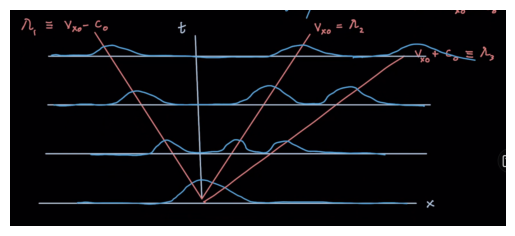

In [3]:
image = mpimg.imread('Gaussian Advect.png')
#fig,axs=plt.figure()
plt.imshow(image)
plt.axis('off')

What if we have discontinuous initial conditions?

Lets consider some initial condition:

$U_0(x)= \begin{cases} U_L & \text{if } x<0 \\ U_R & \text{if } x \geq 0 \end{cases}$

so what do we do? We let this discontinuity propogate (at constant velocity) from the origin such that at time $T$, our discontinuity has propogated to position $X$ (this is 'declared'). Since it's discontinuous we need to use finite volume instead of finite difference, so we integrate our PDE.

our PDE: $U_t + A U_x = 0$

we get:

$\int_{t=0}^{t=T}\int_{x=0}^{x=X}(U_t + A U_x)dxdt = 0$

(-0.5, 753.5, 427.5, -0.5)

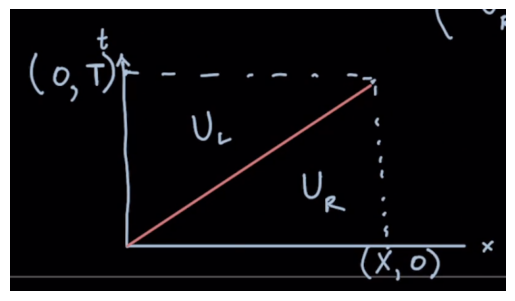

In [4]:
image = mpimg.imread('Discontinuity.png')
#fig,axs=plt.figure()
plt.imshow(image)
plt.axis('off')

which after some algebra is:

$A(U_R-U_L)=\frac{X}{T}(U_R-U_L)$

which is another eigenvector equation! The eigenvalue is the speed of the discontinuity (i.e. $\lambda = \frac{X}{T}$)!

So our solution is now:

$U(x,t)= \begin{cases} U_L & \text{for } x<\lambda t \\ U_R & \text{for } x \geq \lambda t\end{cases}$

Suppose we have this initial condition:

$U_0(x)= \begin{cases} U_L & \text{if } x<0 \\ U_R+w^m\vec{r}^m & \text{if } x \geq 0 \end{cases}$

so now our solution is (after plugging in)

$U(x,t)= \begin{cases} U_L & \text{for } x<\lambda^m t \\ U_L+w^m\vec{r}^m & \text{for } x \geq \lambda^m t\end{cases}$

This may look like a more specific version of the first discontinuous initial state, but in fact it is more general, because __we did not have to artificially specify the speed at which our discontinuity travelled__. In this case it popped out of the algebra, and unlike in the first case, this eigenvalue speed (i.e. $\lambda^m$) is specified COMPLETELY by our matrix 

(Recall that $U_L, U_R$ are BOTH vectors (in the case of 1D Euler it is a matrix of velocity, pressure, and density))

What happens if the left and right states are chosen randomly? 

This is called the __Riemann Problem__. It turns out that if one has a complete set of eigenvectors for the matrix A, one can express the jump as a linear combination of the eigenvectors. Again, the eigenweights can be found via the dot product.

Now, each jump introduces a different speed at which a component of the discontinuity travels.

This is effectively the same as the continuous solution!

Consider the 1D sod shock tube. 

We have a discontinuity in all primitive variables.

So then we get

(-0.5, 737.5, 307.5, -0.5)

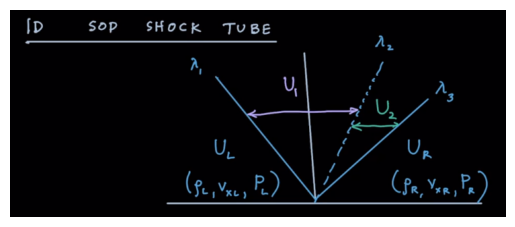

In [10]:
image = mpimg.imread('Shock_Tube.png')
#fig,axs=plt.figure()
plt.imshow(image)
plt.axis('off')

(-0.5, 1625.5, 523.5, -0.5)

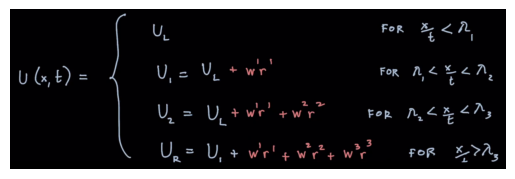

In [5]:
image2 = mpimg.imread('Shock_Tube2.png')
plt.imshow(image2)
plt.axis('off')